In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)
import keras.datasets
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from sklearn.neighbors import KernelDensity
#from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [3]:
def list_shape(List):
    return np.array(List).shape

In [4]:
def flatten_bw_dataset(X):
    shape = np.array(X).shape
    flatten_shape = shape[1]*shape[2]
    result = []
    for i in range(len(X)):
        result.append(X[i].reshape(flatten_shape))
    return np.array(result)

def anti_flatten_bw_dataset(X):
    shape = np.array(X).shape
    anti_flatten_shape = int(np.sqrt(shape[1]))
    
    result = []
    for i in range(len(X)):
        result.append(X[i].reshape((anti_flatten_shape, anti_flatten_shape)))
    return np.array(result)

def show_anti_flatten(columns,rows,arr):
    w=10
    h=10
    arr = anti_flatten_bw_dataset(arr)
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, columns*rows +1):
        img = arr[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img,cmap=plt.get_cmap('gray'), interpolation='none')
    plt.show()
    return

In [5]:
mnist = keras.datasets.mnist
(mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()

In [6]:
cifar = keras.datasets.cifar10
(C_x_train, C_y_train), (C_x_test, C_y_test) = cifar.load_data()

In [7]:
def find_idx(arr, target):
    ans = []
    for i in range(len(arr)):
        if arr[i] == target:
            ans.append(i)
    return ans

In [8]:
def separate_one_class(target_class_label, x_train, y_train, x_test, y_test):
    with_train_idx = find_idx(y_train, target_class_label)
    with_test_idx = find_idx(y_test, target_class_label)
    without_train_idx = list(set(range(len(y_train))).difference(set(with_train_idx)))
    without_test_idx = list(set(range(len(y_test))).difference(set(with_test_idx)))
    with_train = x_train[with_train_idx]
    with_test = x_test[with_test_idx]
    without_train = x_train[without_train_idx]
    without_test = x_test[without_test_idx]
    with_train_y = y_train[with_train_idx]
    with_test_y = y_test[with_test_idx]
    without_train_y = y_train[without_train_idx]
    without_test_y = y_test[without_test_idx]
    return with_train, with_train_y, without_train, without_train_y, with_test, with_test_y, without_test, without_test_y

In [9]:
def MNIST_To_CIFAR_FORM(mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y):
    """
    Change the one-channel to RBG-channel on mnist_train_x and mnist_test_x
    Change the shape of mnist_train_y and mnist_test_y from (length) to (length,1)
    ---------------------------------------
    inputs:
    mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y which is all multi-dimension array
    It is recommended to use the following way to import the data
    ========================== codes ==========================
    mnist = keras.datasets.mnist
    (mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()
    ========================== codes ==========================
    outputs:
    mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y 
    """
    from skimage import exposure
    import imutils
    B= []
    for i in range(len(mnist_train_x)):
        A = mnist_train_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_train_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    B= []
    for i in range(len(mnist_test_x)):
        A = mnist_test_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_test_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    M_train_y = np.array([[mnist_train_y[i]] for i in range(len(mnist_train_y))])
    M_test_y = np.array([[mnist_test_y[i]] for i in range(len(mnist_test_y))])
    return mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y

In [11]:
import pickle
infile = open('M_representation.pkl','rb')
M_representation = pickle.load(infile)
infile = open('C_representation.pkl','rb')
C_representation = pickle.load(infile)

In [13]:
kde = KernelDensity(bandwidth = 0.23357214690901226)
kde.fit(M_representation['MNIST_train'])

KernelDensity(algorithm='auto', atol=0, bandwidth=0.23357214690901226,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

In [14]:
#ID
scores_MNIST = kde.score_samples(M_representation['MNIST_test'])

(array([1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 3.00e+00,
        1.20e+01, 9.98e+03]),
 array([-79458.97815659, -75472.96065369, -71486.94315078, -67500.92564788,
        -63514.90814497, -59528.89064207, -55542.87313916, -51556.85563626,
        -47570.83813336, -43584.82063045, -39598.80312755, -35612.78562464,
        -31626.76812174, -27640.75061883, -23654.73311593, -19668.71561302,
        -15682.69811012, -11696.68060722,  -7710.66310431,  -3724.64560141,
           261.3719015 ]),
 <a list of 20 Patch objects>)

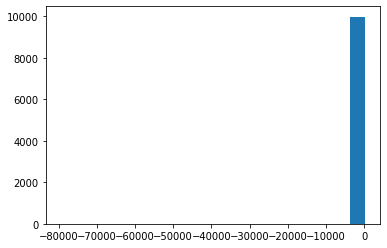

In [15]:
plt.hist(scores_MNIST, bins = 20)

In [16]:
#OD
scores_cifar = kde.score_samples(M_representation['CIFAR_train'])

In [0]:
sum(scores_MNIST>-18,0)

2102

(array([  2.,   0.,   4.,   2.,   4.,  11.,  18.,  44., 113., 109., 156.,
        216., 251., 340., 380., 546., 728., 890., 887., 299.]),
 array([-65.79733371, -63.36121601, -60.92509831, -58.48898062,
        -56.05286292, -53.61674522, -51.18062753, -48.74450983,
        -46.30839213, -43.87227443, -41.43615674, -39.00003904,
        -36.56392134, -34.12780365, -31.69168595, -29.25556825,
        -26.81945056, -24.38333286, -21.94721516, -19.51109747,
        -17.07497977]),
 <a list of 20 Patch objects>)

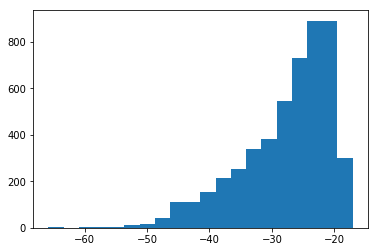

In [0]:
plt.hist(scores_cifar, bins = 20)

In [0]:
from collections import Counter
Counter(C_y_train[:5000][scores_cifar>-18.1].reshape(54))

Counter({0: 12, 1: 11, 2: 4, 3: 4, 4: 3, 5: 4, 6: 5, 7: 4, 8: 3, 9: 4})

In [0]:
def show(columns,rows,arr):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, columns*rows +1):
        img = arr[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    return

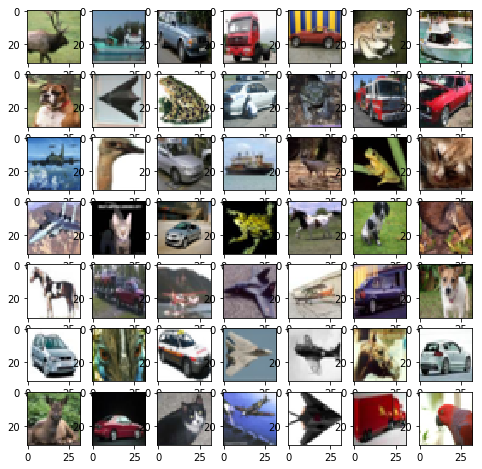

In [0]:
# These are high probability CIFAR samples in the MNIST-distribution
show(7,7,C_x_train[:5000][scores_cifar>-18.1])